In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point, LineString
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

In [190]:
# read the illinois state shp data
illinois_shp = gpd.read_file('raw_il_census_tracts_shapefile/tl_2019_17_tract.shp')
# illinois_shp = illinois_shp.loc[:,('GEOID','ALAND')]
# illinois_shp['centroid'] = illinois_shp.centroid.to_crs(epsg = 4326)
# illinois_shp = pd.DataFrame(illinois_shp)
illinois_shp
# illinois_shp.to_csv('GEOID_ALAND.csv')

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,17,091,011700,17091011700,117,Census Tract 117,G5020,S,2370100,102060,+41.1294653,-087.8735796,"POLYGON ((-87.88768 41.13594, -87.88764 41.136..."
1,17,091,011800,17091011800,118,Census Tract 118,G5020,S,1791332,55670,+41.1403452,-087.8760059,"POLYGON ((-87.89410 41.14388, -87.89400 41.143..."
2,17,119,400951,17119400951,4009.51,Census Tract 4009.51,G5020,S,5169973,169066,+38.7277628,-090.1002620,"POLYGON ((-90.11192 38.70281, -90.11128 38.703..."
3,17,119,400952,17119400952,4009.52,Census Tract 4009.52,G5020,S,5751299,305906,+38.7301416,-090.0827783,"POLYGON ((-90.09442 38.72031, -90.09360 38.720..."
4,17,135,957500,17135957500,9575,Census Tract 9575,G5020,S,450037682,512225,+39.3934535,-089.5975234,"POLYGON ((-89.70369 39.34803, -89.69928 39.348..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3118,17,037,000100,17037000100,1,Census Tract 1,G5020,S,99421738,712972,+42.1046955,-088.6560753,"POLYGON ((-88.73488 42.10620, -88.73483 42.106..."
3119,17,037,001500,17037001500,15,Census Tract 15,G5020,S,38529459,171069,+41.8855370,-088.7392051,"POLYGON ((-88.78378 41.84907, -88.77716 41.860..."
3120,17,037,000400,17037000400,4,Census Tract 4,G5020,S,136874050,1081155,+42.0187609,-088.6804994,"POLYGON ((-88.78353 42.06425, -88.78350 42.064..."
3121,17,037,000300,17037000300,3,Census Tract 3,G5020,S,285569285,465644,+41.9592680,-088.8666313,"POLYGON ((-88.94215 42.06505, -88.94211 42.065..."


In [191]:
exposure_df = pd.read_csv("Streetlight_Data/clean_data/dptotal/dptotal_exposure_df.csv")[['FIPS','exposure1','exposure2','exposure3','exposure4']]

# inflow_exposure_df = pd.read_csv("Streetlight_Data/clean_data/dptotal/dptotal_inflow_exposure_df.csv")[['FIPS','inflow_exposure1','inflow_exposure2','inflow_exposure3','inflow_exposure4']]
# inflow_exposure_df
# exposure_df['FIPS'] = str(exposure_df['FIPS'])
exposure_df['GEOID']='1'
for i in range(exposure_df.shape[0]):    
    exposure_df['GEOID'][i] = str(exposure_df['FIPS'][i])
exposure_df = exposure_df[['GEOID','exposure1','exposure2','exposure3','exposure4']]

# inflow_exposure_df['GEOID']='1'
# for i in range(inflow_exposure_df.shape[0]):    
#     inflow_exposure_df['GEOID'][i] = str(inflow_exposure_df['FIPS'][i])
# inflow_exposure_df = inflow_exposure_df[['GEOID','inflow_exposure1','inflow_exposure2','inflow_exposure3','inflow_exposure4']]
# type(inflow_exposure_df['GEOID'][0])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [179]:
inflow_exposure_df

NameError: name 'inflow_exposure_df' is not defined

In [192]:

# exposure_df["exposure1"] = np.log(1+exposure_df["exposure1"]) * 10**4
# exposure_df["exposure2"] = np.log(1+exposure_df["exposure2"]) * 10**4
# exposure_df["exposure3"] = np.log(1+exposure_df["exposure3"]) * 10**4
# exposure_df["exposure4"] = np.log(1+exposure_df["exposure4"]) * 10**4

exposure_list = ["exposure1", "exposure2", "exposure3", "exposure4"]
for exposure in exposure_list:
    lower = np.quantile(exposure_df[exposure],0.05)
    upper = np.quantile(exposure_df[exposure],0.95)
    exposure_df[exposure_df[exposure] < lower] = 0   
    exposure_df[exposure_df[exposure] > upper] = upper
    

# inflow_exposure_list = ["inflow_exposure1", "inflow_exposure2", "inflow_exposure3", "inflow_exposure4"]
# for exposure in inflow_exposure_list:
#     lower = np.quantile(inflow_exposure_df[exposure],0.05)
#     upper = np.quantile(inflow_exposure_df[exposure],0.95)
#     inflow_exposure_df[inflow_exposure_df[exposure] < lower] = 0   
#     inflow_exposure_df[inflow_exposure_df[exposure] > upper] = upper

In [193]:
exposure_df

,GEOID,exposure1,exposure2,exposure3,exposure4
0,17001000100,0.000182,0.000026,0.000074,0.000717
1,17001000201,0.000031,0.000004,0.000013,0.000122
2,17001000202,0.000056,0.000008,0.000023,0.000220
3,17001000400,0.000076,0.000011,0.000031,0.000300
4,17001000500,0.000034,0.000005,0.000014,0.000135
...,...,...,...,...,...
2497,17203030501,0.001208,0.000034,0.000093,0.000817
2498,17203030502,0.000095,0.000003,0.000007,0.000064
2499,17203030601,0.001053,0.000029,0.000081,0.000714
2500,17203030602,0.000231,0.000006,0.000018,0.000157


In [194]:
# exposure_shp =  gpd.GeoDataFrame(exposure_df)
# illinois_shp[['FIPS','exposure1','exposure2','exposure3','exposure4']] = exposure_df[['FIPS','exposure1','exposure2','exposure3','exposure4']]
# illinois_shp
illinois_shp = pd.merge(illinois_shp, exposure_df, how='left', on="GEOID")
# illinois_shp = pd.merge(illinois_shp, inflow_exposure_df, how='left', on="GEOID")

In [195]:
illinois_shp


,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,exposure1,exposure2,exposure3,exposure4
0,17,091,011700,17091011700,117,Census Tract 117,G5020,S,2370100,102060,+41.1294653,-087.8735796,"POLYGON ((-87.88768 41.13594, -87.88764 41.136...",0.000026,0.000072,0.000161,0.000187
1,17,091,011800,17091011800,118,Census Tract 118,G5020,S,1791332,55670,+41.1403452,-087.8760059,"POLYGON ((-87.89410 41.14388, -87.89400 41.143...",0.000025,0.000069,0.000156,0.000181
2,17,119,400951,17119400951,4009.51,Census Tract 4009.51,G5020,S,5169973,169066,+38.7277628,-090.1002620,"POLYGON ((-90.11192 38.70281, -90.11128 38.703...",0.000043,0.000072,0.000162,0.000556
3,17,119,400952,17119400952,4009.52,Census Tract 4009.52,G5020,S,5751299,305906,+38.7301416,-090.0827783,"POLYGON ((-90.09442 38.72031, -90.09360 38.720...",NaN,NaN,NaN,NaN
4,17,135,957500,17135957500,9575,Census Tract 9575,G5020,S,450037682,512225,+39.3934535,-089.5975234,"POLYGON ((-89.70369 39.34803, -89.69928 39.348...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3118,17,037,000100,17037000100,1,Census Tract 1,G5020,S,99421738,712972,+42.1046955,-088.6560753,"POLYGON ((-88.73488 42.10620, -88.73483 42.106...",NaN,NaN,NaN,NaN
3119,17,037,001500,17037001500,15,Census Tract 15,G5020,S,38529459,171069,+41.8855370,-088.7392051,"POLYGON ((-88.78378 41.84907, -88.77716 41.860...",NaN,NaN,NaN,NaN
3120,17,037,000400,17037000400,4,Census Tract 4,G5020,S,136874050,1081155,+42.0187609,-088.6804994,"POLYGON ((-88.78353 42.06425, -88.78350 42.064...",NaN,NaN,NaN,NaN
3121,17,037,000300,17037000300,3,Census Tract 3,G5020,S,285569285,465644,+41.9592680,-088.8666313,"POLYGON ((-88.94215 42.06505, -88.94211 42.065...",NaN,NaN,NaN,NaN


In [ ]:
def drawExposure(col, path):
    exposure_map = illinois_shp.plot(
        column=col,
        cmap='Reds',
        edgecolor='black',
        linewidth = 0.1,
        alpha = 0.9, 
        legend = True,

        figsize = (10,10),
                     )
    exposure_map.axis('off')
    plt.savefig(path, dpi = 200)

In [ ]:
drawExposure(col = "exposure1", path = 'Plots/exposure1_map.png')

NameError: name 'illinois_shp' is not defined

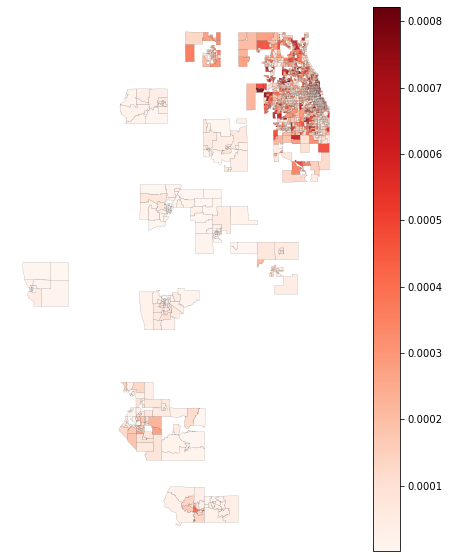

In [198]:
drawExposure(col = "exposure2", path = 'Plots/exposure2_map.png')

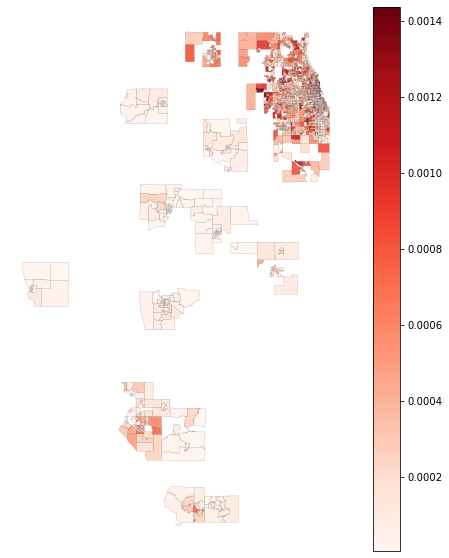

In [199]:
drawExposure(col = "exposure3", path = 'Plots/exposure3_map.png')

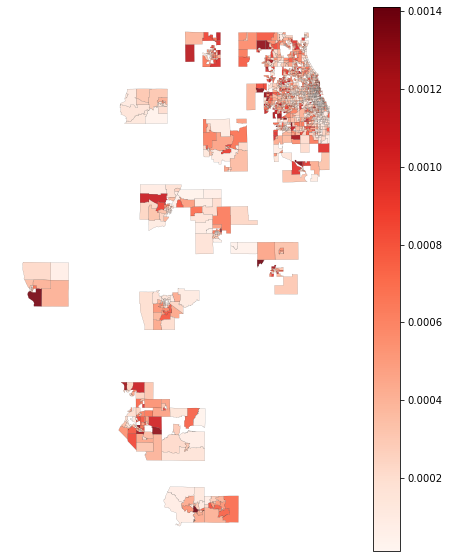

In [200]:
drawExposure(col = "exposure4", path = 'Plots/exposure4_map.png')

KeyError: 'inflow_exposure1'

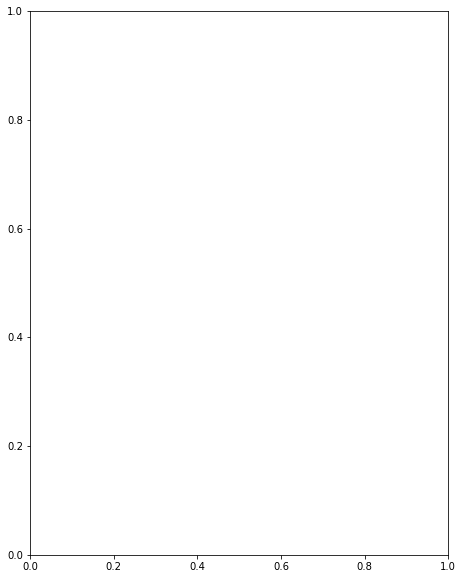

In [79]:
drawExposure(col = "inflow_exposure1", path = 'Plots/inflow_exposure1_map.png')

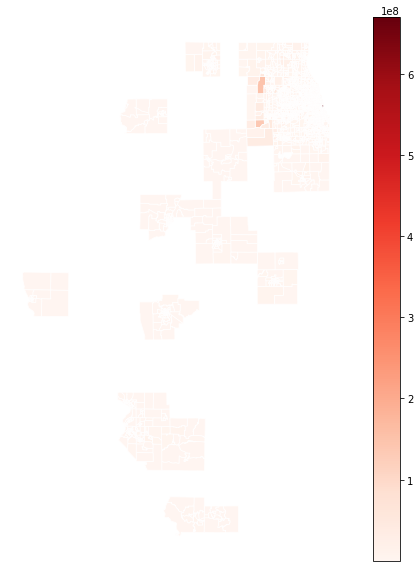

In [55]:
drawExposure(col = "inflow_exposure2", path = 'Plots/inflow_exposure2_map.png')

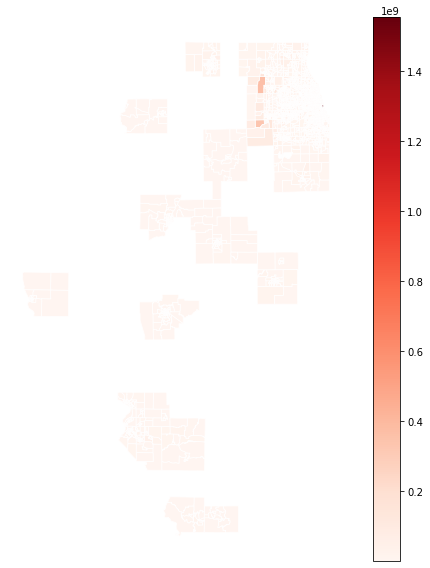

In [56]:
drawExposure(col = "inflow_exposure3", path = 'Plots/inflow_exposure3_map.png')

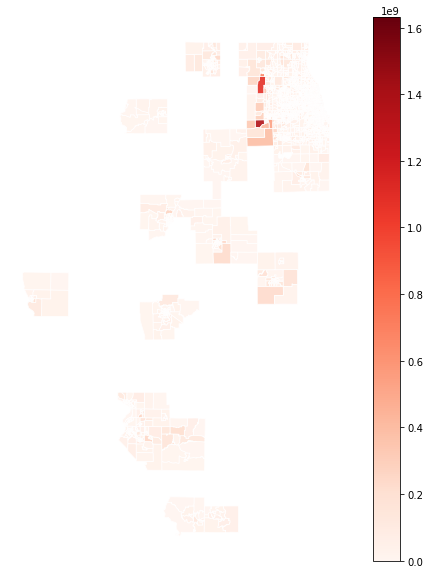

In [57]:
drawExposure(col = "inflow_exposure4", path = 'Plots/inflow_exposure4_map.png')